## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [73]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_full.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_filterbanks.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_augmented.csv')
tap_df = pd.read_csv('../../../Source/Data/train_data_reaugmented_mfcc.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_reaugmented_zcr.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_augmented_stft_tempo.csv')

In [74]:
tap_df.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,../../../Source/Clean_train_clips/Re_augmented...,1,-111.605465,39.188962,-81.679966,20.393887,4.074106,-11.102911,-18.300510,-4.375751,...,-14.746165,-13.217085,2.010731,-9.008981,-11.552828,1.225305,-3.679972,-13.073083,-2.380595,-2.002468
1,../../../Source/Clean_train_clips/Re_augmented...,1,-124.765927,59.099908,-107.706609,34.986722,-7.126354,-4.114656,-28.856100,0.194913,...,-19.339707,-13.854616,-1.720148,-9.828810,-14.683264,-0.436352,-6.158605,-14.315085,-3.680532,-3.380997
2,../../../Source/Clean_train_clips/Re_augmented...,1,-157.899262,62.348967,-104.690150,33.359436,-9.649191,-4.823440,-30.225424,0.160945,...,-22.051224,-11.060202,1.349207,-10.089470,-13.730110,-0.723506,-5.207173,-16.210524,-4.518669,-3.492280
3,../../../Source/Clean_train_clips/Re_augmented...,1,-112.563192,43.322040,-77.893877,23.408783,9.349165,-9.172222,-12.264922,-10.973006,...,-24.674963,-12.264014,5.147175,-9.701486,-10.931069,-0.785393,-1.715562,-19.159819,-5.605177,-2.166103
4,../../../Source/Clean_train_clips/Re_augmented...,1,-127.778268,59.036205,-98.709749,36.489147,-5.924282,-0.904265,-23.447733,-5.196082,...,-32.384483,-10.076653,-0.175095,-9.560018,-14.250261,-1.962245,-4.320603,-20.652914,-8.085718,-2.686323


## Models

### Split the data / Load the data

In [75]:
data = tap_df.iloc[:,2:].values
labels = tap_df['Labels']

In [77]:
#data
#labels


In [32]:
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=11, stratify=labels)

In [33]:
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
#
#X_train = X_train.drop(['Path'], axis = 1).values
#X_test = X_test.drop(['Path'], axis = 1).values
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [78]:
X_train = data
y_train = labels

In [79]:
X_test = pd.read_csv('../../../Source/Data/X_test_audio_mfcc_2.csv')
y_test = pd.read_csv('../../../Source/Data/y_test_audio_mfcc_2.csv')

In [80]:
X_test.head()

,Path,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,../../../Source/Clean_train_clips/Shuffle/3/39...,-114.548223,64.454932,-77.314706,27.647666,-18.880241,6.279307,-20.374333,-0.831546,-5.715018,...,-22.844750,-7.210562,-7.076589,-13.142979,-12.609853,-9.319132,-10.587290,-15.024789,-8.364390,-2.824221
1,../../../Source/Clean_train_clips/Ball_change/...,-103.390895,86.076240,-73.935278,29.533037,-22.579631,3.080539,-20.211751,1.793535,-9.863037,...,-15.762601,-10.053743,-16.649715,-16.621905,-12.470625,-15.124338,-3.046835,-8.643995,-1.299350,-1.434101
2,../../../Source/Clean_train_clips/Shuffle/3/13...,-147.022697,82.257708,-68.832783,32.539703,-27.455560,8.271985,-15.769955,-12.008158,3.731921,...,-23.066932,-5.984023,-2.649878,-14.088877,-8.889521,-3.477000,-5.694297,-7.917601,-4.370791,-2.954681
3,../../../Source/Clean_train_clips/Shuffle/3/24...,-138.297464,54.704689,-79.929603,19.508279,-22.542803,10.450329,-24.721127,1.757363,-14.869691,...,-21.709473,-5.791632,1.467667,-19.687812,-6.999248,-6.416146,-10.514065,-19.087137,-3.717649,-8.090376
4,../../../Source/Clean_train_clips/Shuffle/7/13...,-117.315429,96.050648,-98.759497,19.092895,-23.565324,7.130129,-25.762713,-5.114320,-19.130269,...,-21.705894,-11.200221,-12.618418,-8.927065,-7.479821,-6.126805,-2.563883,-8.348513,-8.931115,-5.765018


In [81]:
X_test = X_test.iloc[:,1:].values
y_test = y_test['Labels']

## Logistic Regression

In [82]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [84]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [85]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
0,1,0,0.556282
2,1,0,0.581410
6,1,0,0.731362
15,0,1,0.384724
17,1,0,0.980700
19,1,0,0.543416
23,1,0,0.622142
48,0,1,0.003170
50,0,1,0.447284
53,0,1,0.303931


In [86]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8260869565217391


### Visualizing results

In [87]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

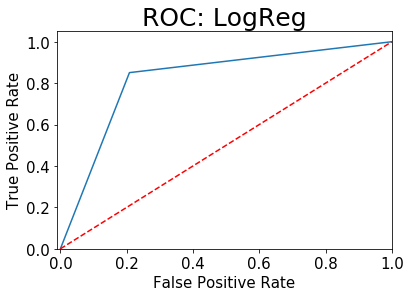

ROC_AUC_Score: 0.8212064676616916


In [88]:
ROC_plot('LogReg',  y_test, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [89]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [91]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [92]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
1,0,0,0.951753,1,0.376585
15,0,1,0.384724,1,0.447496
21,1,1,0.471451,0,0.563412
48,0,1,0.003170,1,0.461320
54,1,1,0.394591,0,0.521570
57,0,1,0.473519,1,0.441988
58,0,1,0.224026,1,0.292847
64,1,1,0.360372,0,0.560442
68,0,1,0.209649,1,0.180273
74,0,1,0.388562,1,0.410586


So where the Random Forest model makes mistakes, the LogReg model makes correct predictions. <br/>Perhaps a voting classifier would improve the accuracy even more.

In [93]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.8956521739130435


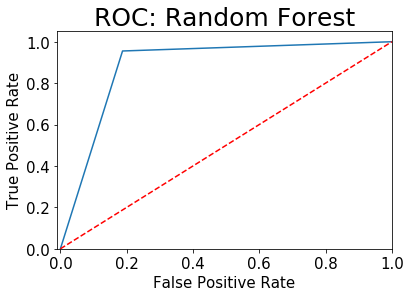

ROC_AUC_Score: 0.8838619402985075


In [94]:
ROC_plot('Random Forest', y_test, predict_rf)

In [95]:
#results.to_csv('../../../Source/Data/results_sklearn_reaugmented_mfcc.csv', index = False)